In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv('data.csv')

In [4]:
features = ['ITEMID', 'OprID', 'WORKER', 'WrkCtrID']
data = df.loc[:, features]
data.loc[:, ('WORKER')] = data['WORKER'].astype(str)
data.loc[:, ('WrkCtrID')] = data['WrkCtrID'].astype(str)
df['TIME_DEVIATION'] = df['CalcHours'] - df['Hours']
X = df['TIME_DEVIATION'].to_numpy().reshape(-1, 1)

In [41]:
lof = LocalOutlierFactor(n_neighbors=6)
y_lof = lof.fit_predict(X)

svmOneClass = svm.OneClassSVM(kernel="rbf", gamma='auto')
y_svm = svmOneClass.fit(X).predict(X)

ee = EllipticEnvelope()
y_ee = ee.fit(X).predict(X)

iso = IsolationForest(random_state=42)
y_iso = iso.fit(X).predict(X)

In [43]:
lof.get_params()

{'algorithm': 'auto',
 'contamination': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'novelty': False,
 'p': 2}

In [44]:
svmOneClass.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.5,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [45]:
ee.get_params()

{'assume_centered': False,
 'contamination': 0.1,
 'random_state': None,
 'store_precision': True,
 'support_fraction': None}

In [46]:
iso.get_params()

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [28]:
def plotAnomaly(y):
    df['anomaly'] = y
    fig, ax = plt.subplots(figsize = (20, 8))

    for i, cluster in df.groupby('anomaly'):
        y = []
        for _ in range(len(cluster['TIME_DEVIATION'])):
            y.append(random.random() * 20)
        label = 'Anomaly' if i == -1 else 'Regular'
        label += " (Count {0})".format(len(y))
        color = 'blue' if i == 1 else 'orange'
        _ = ax.scatter(cluster['TIME_DEVIATION'], y, color=color, label=label)


    ax.legend(loc="lower left")
    ax.set_title('Time deviation anomaly detection')
    ax.set_xlabel('Time deviation (Hours)')
    plt.show()

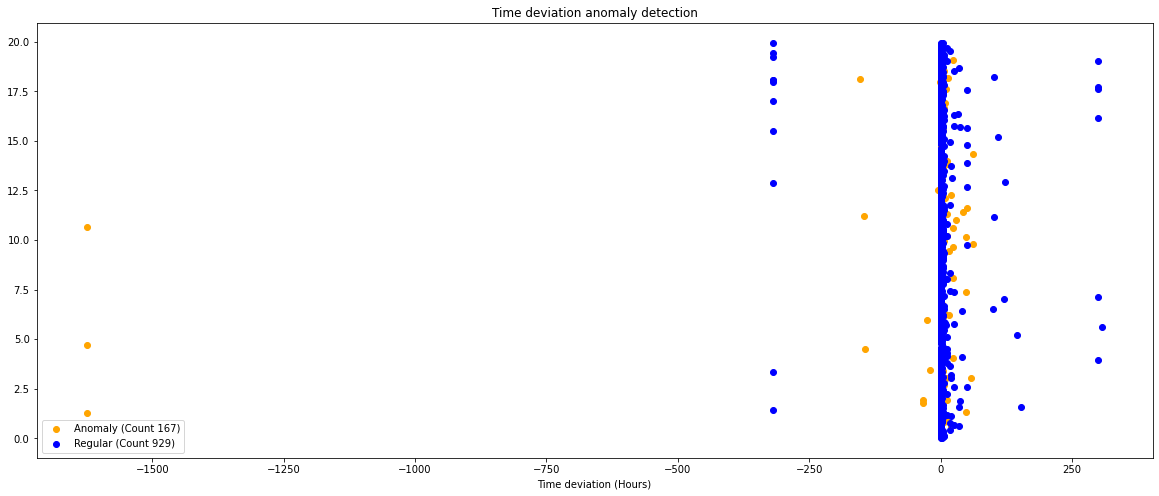

In [29]:
plotAnomaly(y_lof)

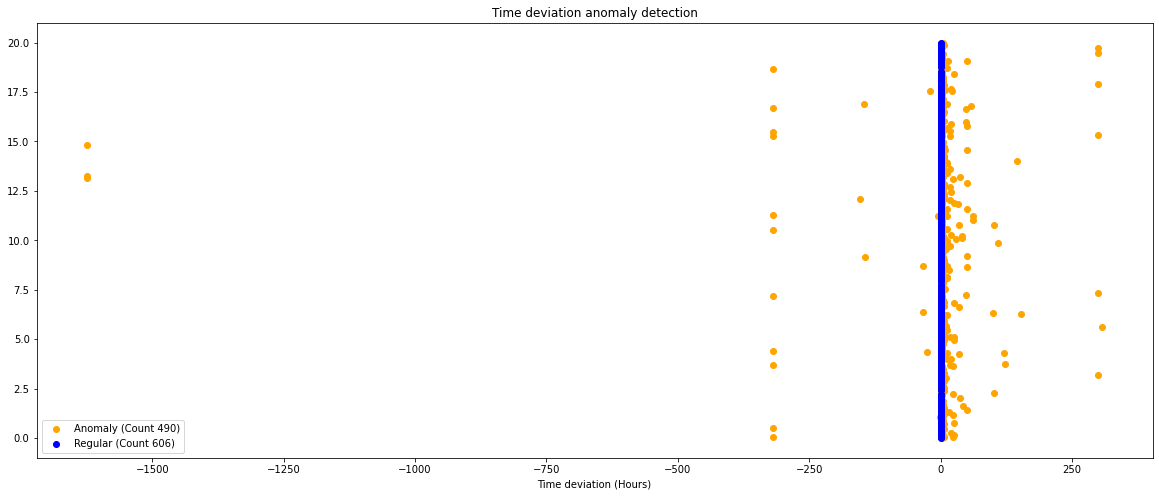

In [40]:
plotAnomaly(y_svm)

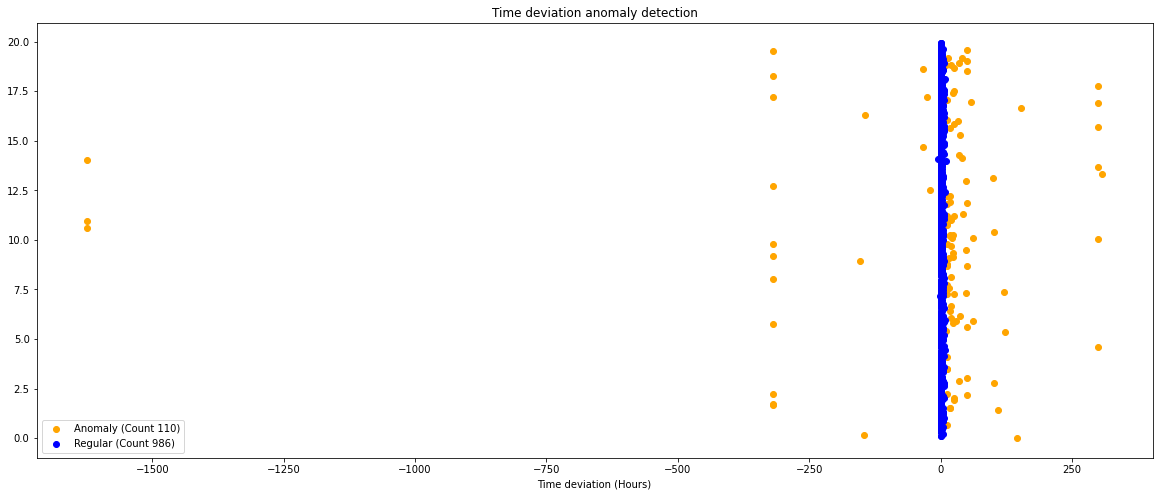

In [31]:
plotAnomaly(y_ee)

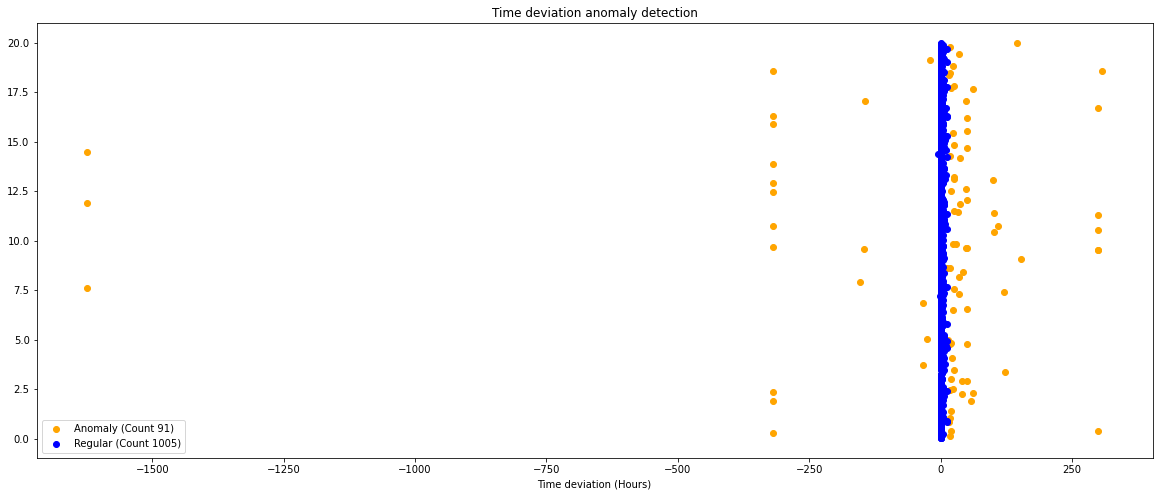

In [30]:
plotAnomaly(y_iso)

# Save  Result

In [17]:
regular = df[df.anomaly == 1]
regular.to_csv("regular.csv")